# Introduction:
Ever wondered how banks decide who gets a loan and who doesn't? Step into the fascinating world of **Credit Scoring Models**! These aren't just dry algorithms; they're the silent architects of financial trust, meticulously analyzing a symphony of an individual's financial history, payment rhythms, and debt dynamics.

Imagine a sophisticated digital detective, sifting through vast datasets to uncover patterns that predict financial reliability. From predicting the likelihood of a loan default to setting personalized interest rates, credit scoring models empower lenders to make swift, fair, and data-driven decisions. They're the vital backbone ensuring the pulse of modern finance beats steadily, making access to credit both efficient and equitable.

# Task:
Objective: Predict an individual's creditworthiness using past financial data.
Approach: Use classification algorithms like Logistic Regression, Decision Trees, or Random Forest.
Key Features:
● Feature engineering from financial history.
● Model accuracy assessment using metrics like Precision, Recall, F1-Score, ROC-AUC.
● Dataset could include: income, debts, payment history, etc.

# Preprocessing Data

In [66]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score, recall_score, classification_report, confusion_matrix, precision_score, roc_auc_score, roc_curve

In [67]:
df = pd.read_csv('/content/adult.csv.zip')
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K


In [68]:
df.shape

(48842, 15)

In [69]:
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'educational-num',
       'marital-status', 'occupation', 'relationship', 'race', 'gender',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')

# Feature Engineering

In [70]:
df['total-capital'] = df['capital-gain'] - df['capital-loss']
df.head()

,age,workclass,fnlwgt,education,educational-num,marital-status,occupation,relationship,race,gender,capital-gain,capital-loss,hours-per-week,native-country,income,total-capital
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K,0
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K,0
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K,0
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K,7688
4,18,?,103497,Some-college,10,Never-married,?,Own-child,White,Female,0,0,30,United-States,<=50K,0


In [71]:
df.drop(columns= ['fnlwgt', 'educational-num', 'native-country', 'race', 'gender', 'capital-gain', 'capital-loss'], inplace= True)

# Checking Missing Values.

In [72]:
df.isnull().sum()

,0
age,0
workclass,0
education,0
marital-status,0
occupation,0
relationship,0
hours-per-week,0
income,0
total-capital,0


In [73]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48842 entries, 0 to 48841
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             48842 non-null  int64 
 1   workclass       48842 non-null  object
 2   education       48842 non-null  object
 3   marital-status  48842 non-null  object
 4   occupation      48842 non-null  object
 5   relationship    48842 non-null  object
 6   hours-per-week  48842 non-null  int64 
 7   income          48842 non-null  object
 8   total-capital   48842 non-null  int64 
dtypes: int64(3), object(6)
memory usage: 3.4+ MB


# Data Encoding

In [74]:
categ_cols = [feature for feature in df.columns if df[feature].dtype == 'object']
num_cols = [feature for feature in df.columns if df[feature].dtype != 'object']

In [75]:
from sklearn.preprocessing import LabelEncoder, StandardScaler
ss = StandardScaler()
le = LabelEncoder()

for col in categ_cols:
  df[col] = le.fit_transform(df[col])

for col in num_cols:
  df[col] = ss.fit_transform(df[[col]])

In [76]:
df.head()

,age,workclass,education,marital-status,occupation,relationship,hours-per-week,income,total-capital
0,-0.995129,4,1,4,7,3,-0.034087,0,-0.132642
1,-0.046942,4,11,2,5,0,0.772930,0,-0.132642
2,-0.776316,2,7,2,11,0,-0.034087,1,-0.132642
3,0.390683,4,15,2,7,0,-0.034087,1,0.895787
4,-1.505691,0,15,4,0,3,-0.841104,0,-0.132642


# Outlier Detection

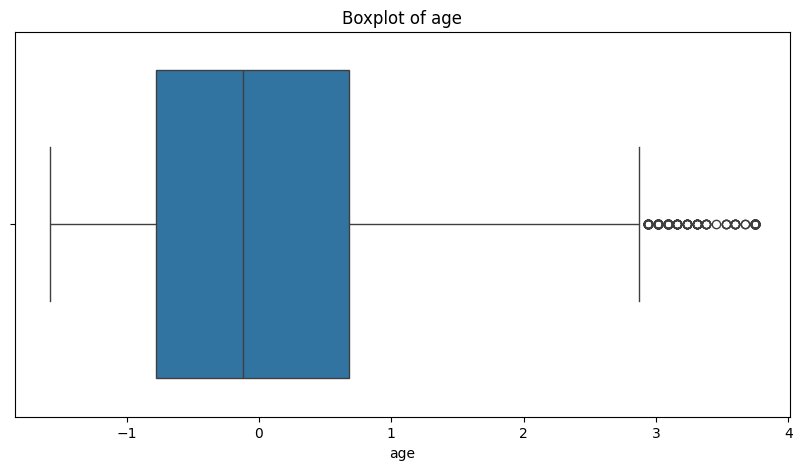

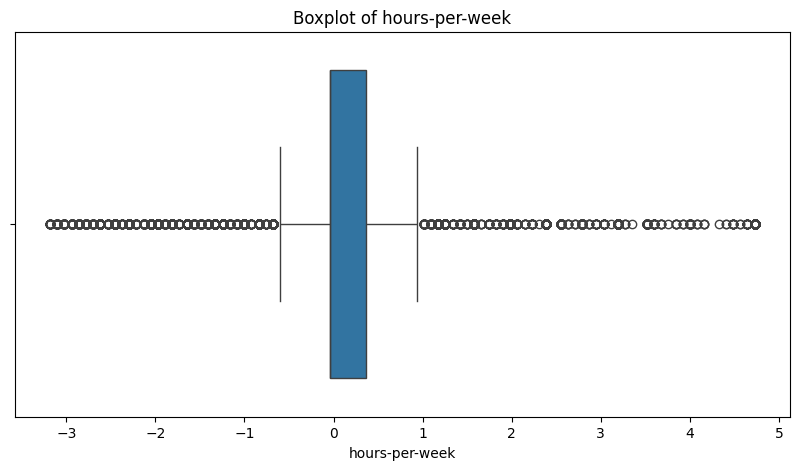

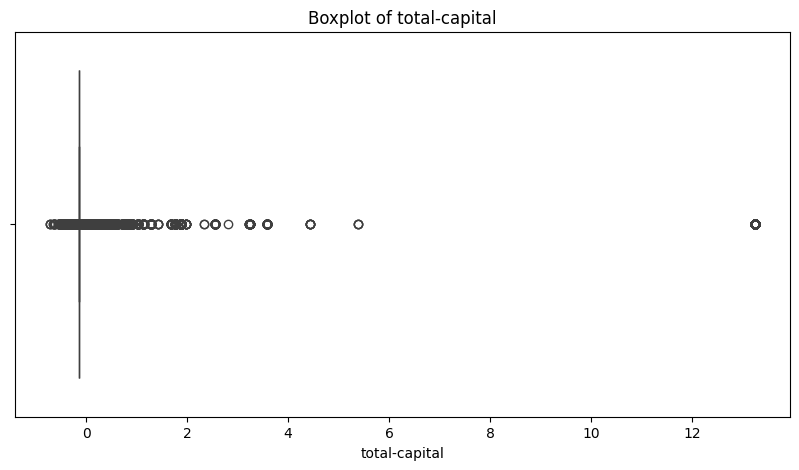

In [77]:
# Outlier Detection
for col in num_cols:
    plt.figure(figsize=(10, 5))
    sns.boxplot(x= df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

# Outlier Removal through IQR

In [78]:
for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    df = df[(df[col] >= lower_bound) & (df[col] <= upper_bound)]

print("Shape of DataFrame after outlier removal:", df.shape)

Shape of DataFrame after outlier removal: (30626, 9)


# Performing EDA

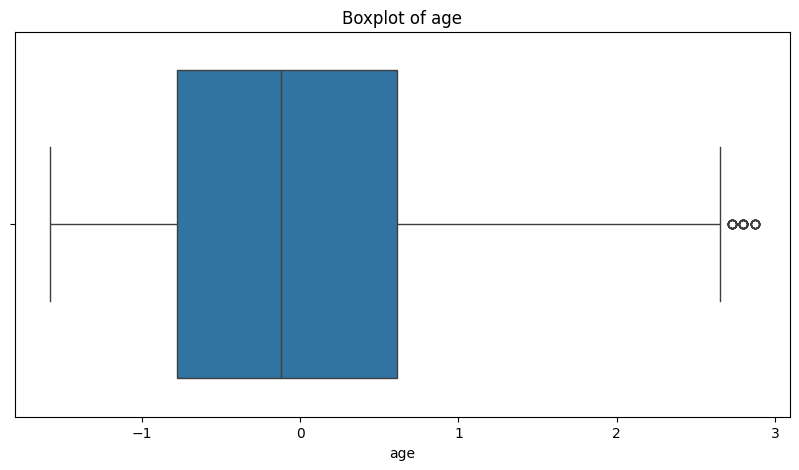

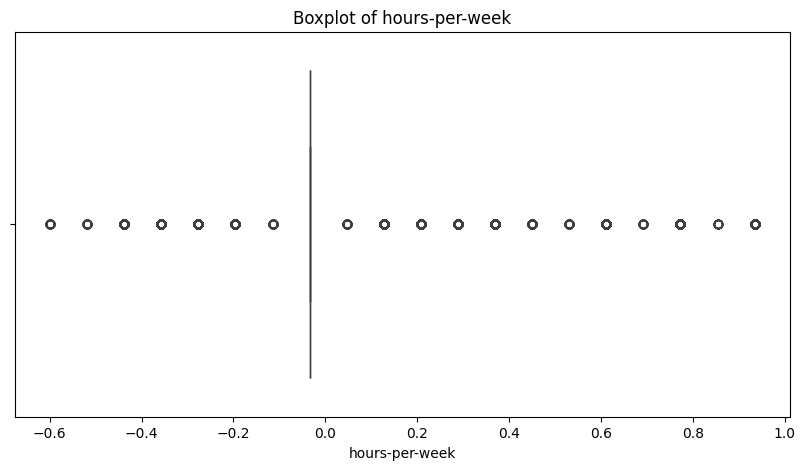

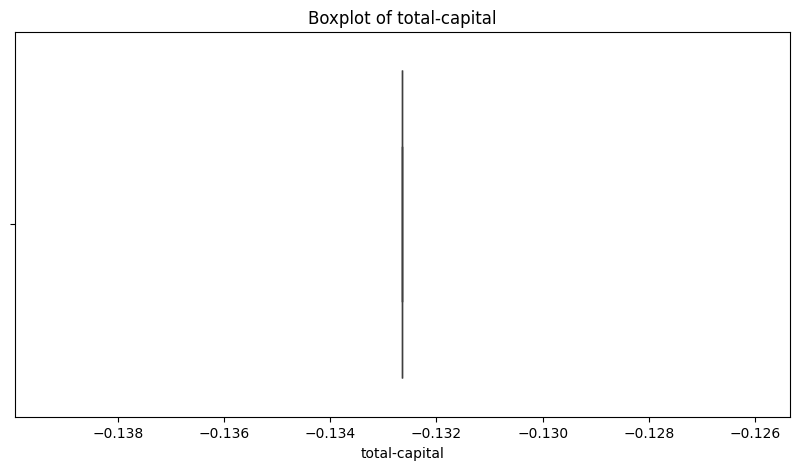

In [79]:
for col in num_cols:
  plt.figure(figsize=(10, 5))
  sns.boxplot(x=df[col])
  plt.title(f'Boxplot of {col}')
  plt.show()

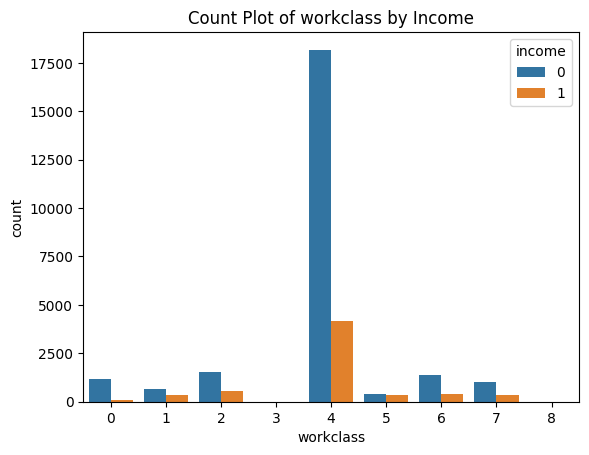

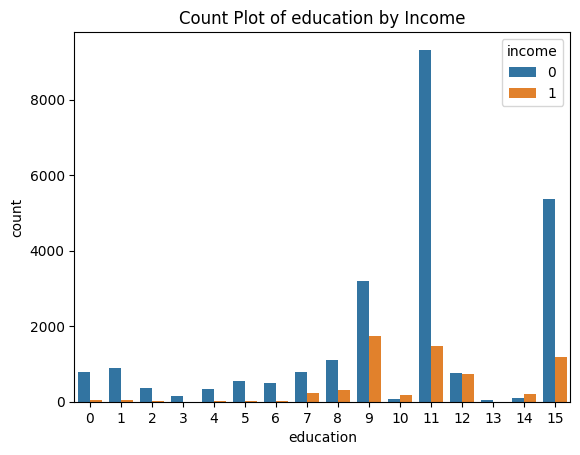

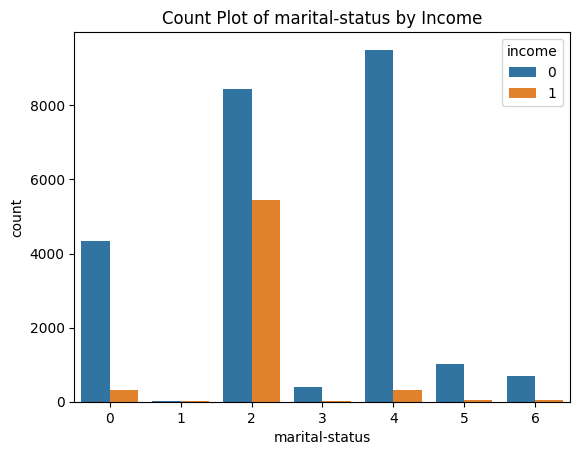

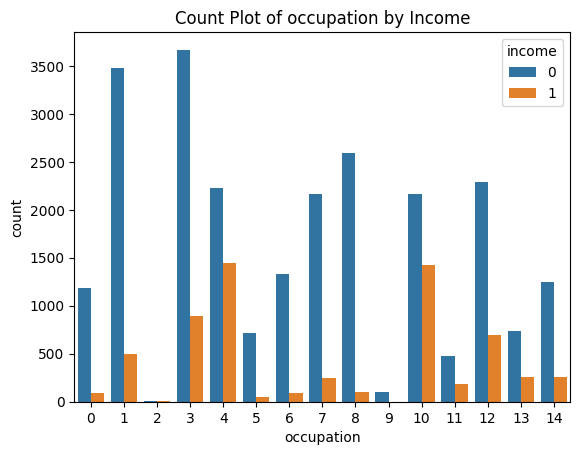

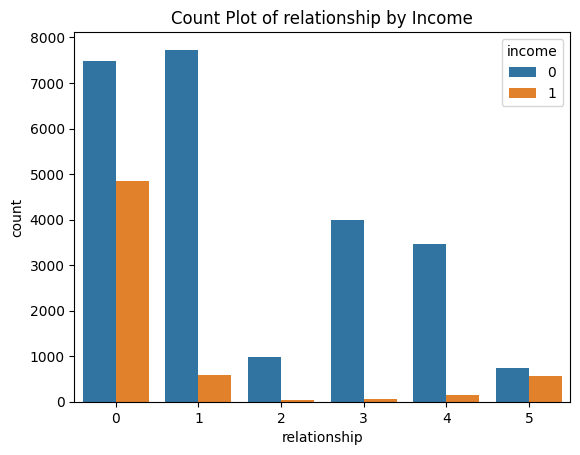

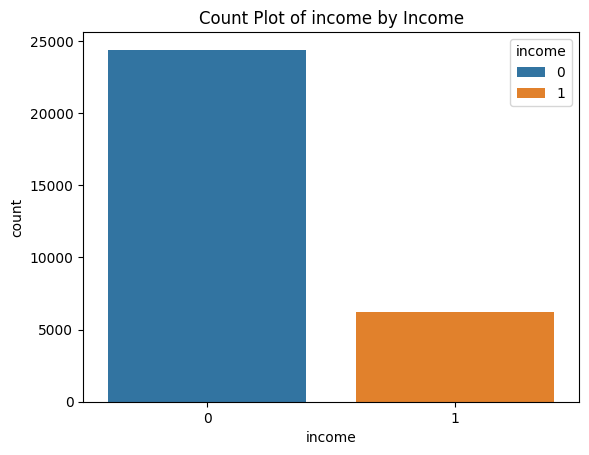

In [80]:
for col in categ_cols:
    sns.countplot(x=col, hue='income', data=df)
    plt.title(f'Count Plot of {col} by Income')
    plt.show()

In [81]:
df.dtypes

,0
age,float64
workclass,int64
education,int64
marital-status,int64
occupation,int64
relationship,int64
hours-per-week,float64
income,int64
total-capital,float64


# Splitting Data

In [82]:
X = df.drop('income', axis=1)
y = df['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train.shape, X_test.shape

((24500, 8), (6126, 8))

# First Model Selection

In [83]:
from sklearn.tree import DecisionTreeClassifier
dt_clf = DecisionTreeClassifier()
dt_clf.fit(X_train, y_train)
y_pred_dt = dt_clf.predict(X_test)
y_pred_proba_dt = dt_clf.predict_proba(X_test)[:, 1]

# First Model Evaluation

In [84]:
print('Decision Tree Classifier Performance:')
print('f1 Score:', f1_score(y_test, y_pred_dt))
print('Precision Score: ', precision_score(y_test, y_pred_dt))
print('Recall Score: ', recall_score(y_test, y_pred_dt))
print('Classification Report: \n', classification_report(y_test, y_pred_dt))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_pred_proba_dt))

Decision Tree Classifier Performance:
f1 Score: 0.46958740961293066
Precision Score:  0.49110320284697506
Recall Score:  0.44987775061124696
Classification Report: 
               precision    recall  f1-score   support

           0       0.87      0.88      0.87      4899
           1       0.49      0.45      0.47      1227

    accuracy                           0.80      6126
   macro avg       0.68      0.67      0.67      6126
weighted avg       0.79      0.80      0.79      6126

ROC-AUC Score:  0.7247725156556907


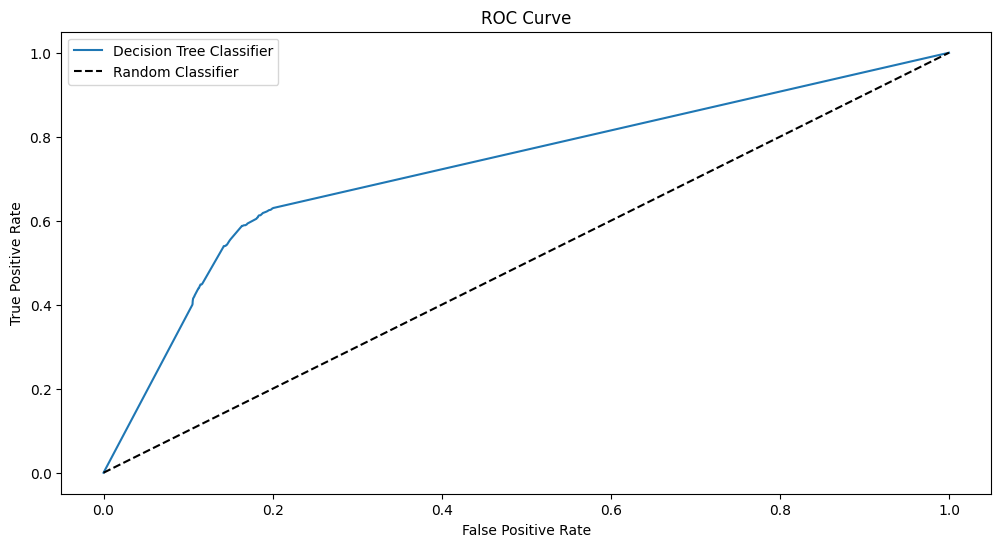

In [85]:
fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_pred_proba_dt)
plt.figure(figsize= (12, 6))
plt.plot(fpr_dt, tpr_dt, label='Decision Tree Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier') # first [0,1] show x-coord & other y-coord's.
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Second Model Selection

In [86]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)
y_pred_proba_lr = lr.predict_proba(X_test)[:, 1]

# Second Model Evaluation

In [87]:
print('f1 Score:', f1_score(y_test, y_pred))
print('Precision Score: ', precision_score(y_test, y_pred))
print('Recall Score: ', recall_score(y_test, y_pred))
print('Classification Report: \n', classification_report(y_test, y_pred))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_pred_proba_lr))

f1 Score: 0.14540466392318244
Precision Score:  0.4588744588744589
Recall Score:  0.08638956805215973
Classification Report: 
               precision    recall  f1-score   support

           0       0.81      0.97      0.88      4899
           1       0.46      0.09      0.15      1227

    accuracy                           0.80      6126
   macro avg       0.63      0.53      0.51      6126
weighted avg       0.74      0.80      0.74      6126

ROC-AUC Score:  0.7433421620399552


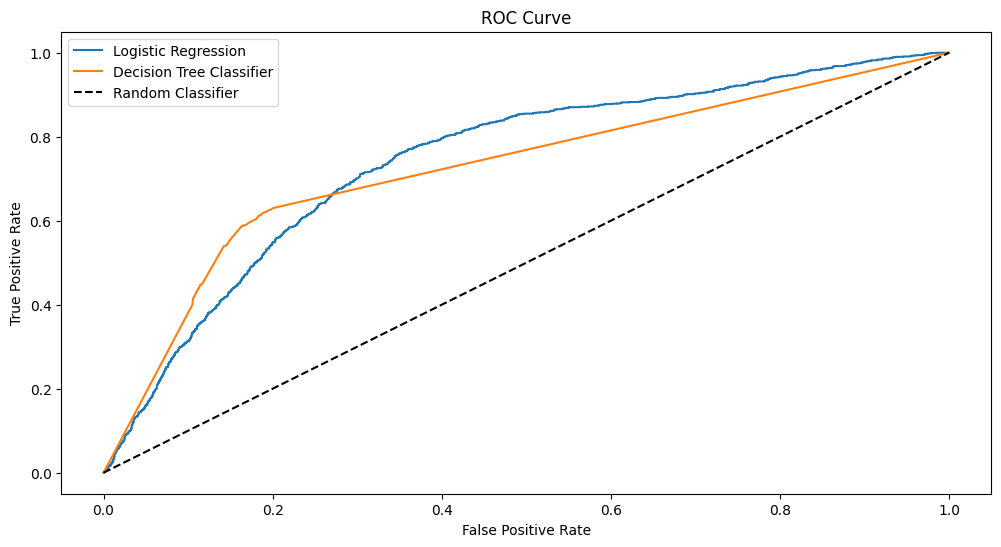

In [88]:
fpr_lr, tpr_lr, thresholds_lr = roc_curve(y_test, y_pred_proba_lr)
plt.figure(figsize= (12, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Third Model Selection

In [89]:
gd_clf = GradientBoostingClassifier()
gd_clf.fit(X_train, y_train)
y_pred_gd = gd_clf.predict(X_test)
y_pred_proba_gd = gd_clf.predict_proba(X_test)[:, 1]

In [90]:
print('f1 score: ', f1_score(y_test, y_pred_gd))
print('Precision Score: ', precision_score(y_test, y_pred_gd))
print('Recall Score: ', recall_score(y_test, y_pred_gd))
print('Classification Report: \n', classification_report(y_test, y_pred_gd))
print('ROC-AUC Score: ', roc_auc_score(y_test, y_pred_proba_gd))

f1 score:  0.5635411708710139
Precision Score:  0.6773455377574371
Recall Score:  0.48247758761206194
Classification Report: 
               precision    recall  f1-score   support

           0       0.88      0.94      0.91      4899
           1       0.68      0.48      0.56      1227

    accuracy                           0.85      6126
   macro avg       0.78      0.71      0.74      6126
weighted avg       0.84      0.85      0.84      6126

ROC-AUC Score:  0.8834649820423075


# Third Model Evaluation

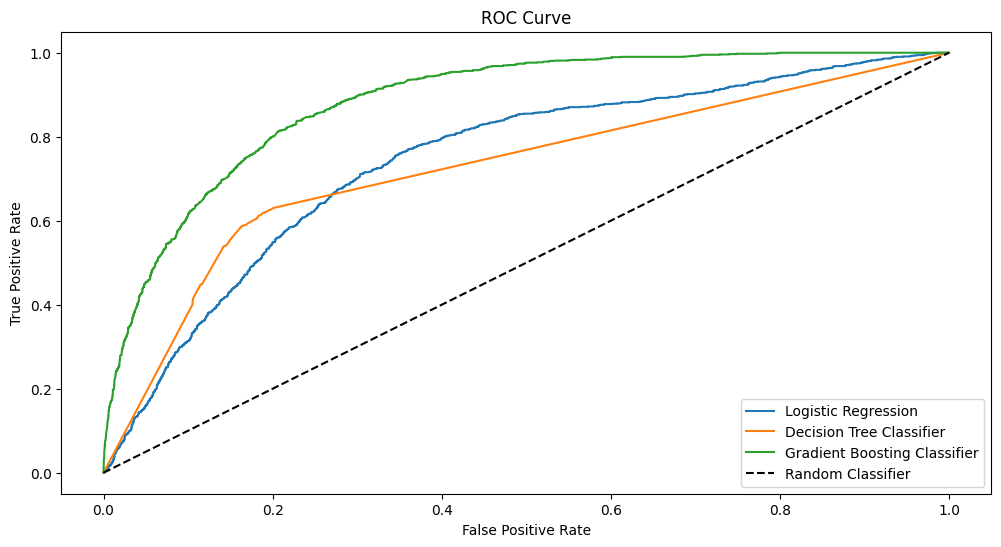

In [91]:
fpr_gd, tpr_gd, thresholds_gd = roc_curve(y_test, y_pred_proba_gd)
plt.figure(figsize= (12, 6))
plt.plot(fpr_lr, tpr_lr, label='Logistic Regression')
plt.plot(fpr_dt, tpr_dt, label='Decision Tree Classifier')
plt.plot(fpr_gd, tpr_gd, label='Gradient Boosting Classifier')
plt.plot([0, 1], [0, 1], 'k--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

# Models Comparison

/tmp/ipython-input-92-2405845436.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='ROC AUC', data=models_comparison_df, palette='viridis')


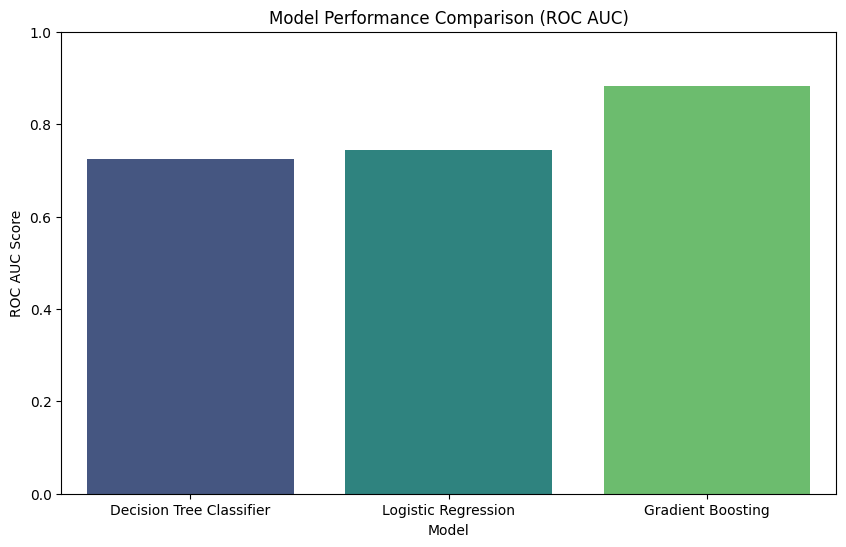

In [92]:
roc_auc_dt = roc_auc_score(y_test, y_pred_proba_dt)
roc_auc_lr = roc_auc_score(y_test, y_pred_proba_lr)
roc_auc_gd = roc_auc_score(y_test, y_pred_proba_gd)

models_comparison_df = pd.DataFrame({
    'Model': ['Decision Tree Classifier', 'Logistic Regression', 'Gradient Boosting'],
    'ROC AUC': [roc_auc_dt, roc_auc_lr, roc_auc_gd]
})

plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='ROC AUC', data=models_comparison_df, palette='viridis')
plt.title('Model Performance Comparison (ROC AUC)')
plt.xlabel('Model')
plt.ylabel('ROC AUC Score')
plt.ylim(0, 1)
plt.show()

# Data Visulization

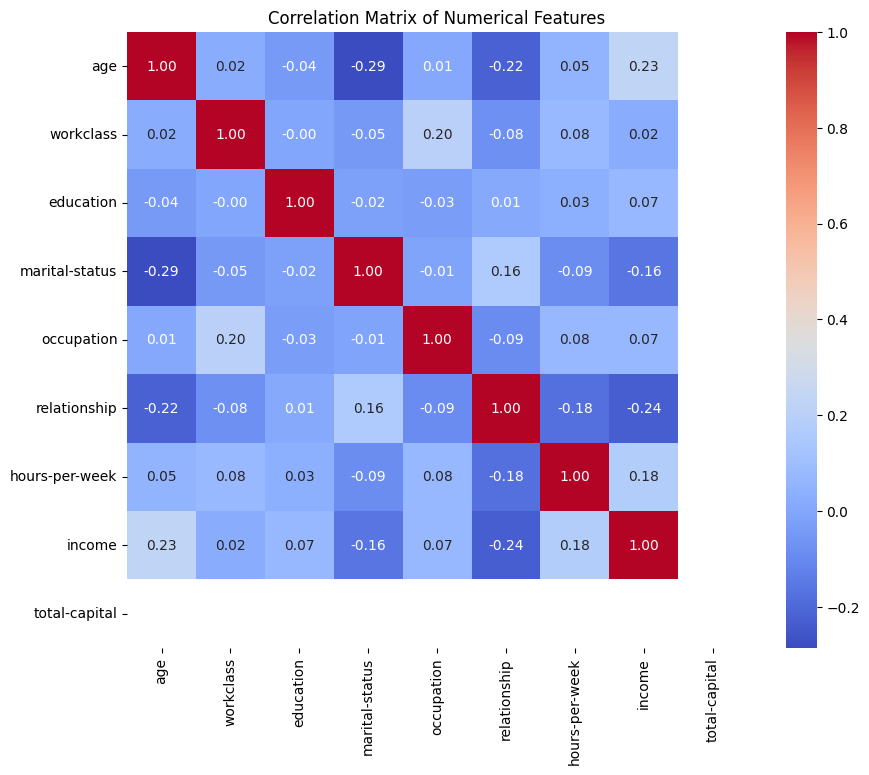

In [93]:
num_cols = [feature for feature in df.columns if df[feature].dtype != 'object']
correlation_matrix = df[num_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix of Numerical Features')
plt.show()

# Saving Model.

In [94]:
import pickle
import os

with open('decision_tree_model_pickle.pkl', 'wb') as f:
    pickle.dump(dt_clf, f)
print("Decision Tree model saved using pickle.")

with open('logistic_regression_model_pickle.pkl', 'wb') as f:
    pickle.dump(lr, f)
print("Logistic Regression model saved using pickle.")

with open('gradient_boosting_model_pickle.pkl', 'wb') as f:
    pickle.dump(gd_clf, f)
print("Gradient Boosting model saved using pickle.")

Decision Tree model saved using pickle.
Logistic Regression model saved using pickle.
Gradient Boosting model saved using pickle.
